In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

np.random.seed(1)

index = pd.date_range(pd.Timestamp('2021-01-01'), pd.Timestamp('2021-04-01'))

def V(df, window: int = 20):
    k = 0.34 / (1.34 + (window + 1) / (window - 1))
    vc = np.log(df.Open / df.Close.shift(1))
    vo = np.log(df.Close / df.Open.shift(1))
    hcv = np.log(df.High / df.Close)
    hov = np.log(df.High / df.Open)
    lcv = np.log(df.Low / df.Close)
    lov = np.log(df.Low / df.Open)
    so = 1 / (window - 1) * (vc**2).rolling(window=window).sum()
    sc = 1 / (window - 1) * (vo**2).rolling(window=window).sum()
    rs = 1 / (window - 1) * (hcv * hov +
                             lcv * lov).rolling(window=window).sum()

    return np.sqrt(so + k * sc + (1 - k) * rs)

def W(i):
    ALL = pd.read_csv('ALL/%s.csv' % i, index_col='date', squeeze=True, parse_dates=True)
    WSB = pd.read_csv('WSB/%s.csv' % i, index_col='date', squeeze=True, parse_dates=True)
    return pd.Series(np.log(WSB/ALL), name='W_' + i, index=index)[index]


<AxesSubplot:>

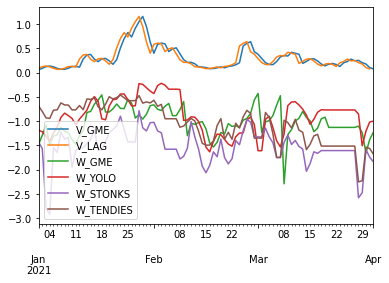

In [42]:
W_GME, W_YOLO, W_STONKS, W_TENDIES = W('GME'), W('YOLO'), W('STONKS'), W('TENDIES')

GME = pd.read_csv('data/GME.csv', usecols=[0, 1, 2, 3, 4], index_col=0, parse_dates=True)
GME = GME.resample('D').interpolate(method='cubic')
V_GME = V(GME, 3).reindex(index).rename('V_GME')
V_LAG = V_GME.shift(-1).rename('V_LAG')

df = pd.concat([V_GME, V_LAG, W_GME, W_YOLO, W_STONKS, W_TENDIES], axis=1)

<AxesSubplot:>

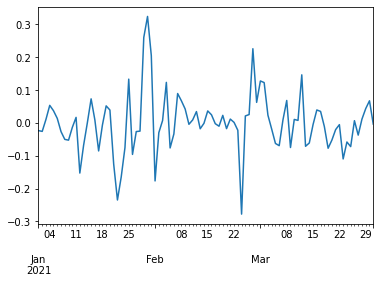

In [47]:
W_GME, W_YOLO, W_STONKS, W_TENDIES = W('GME'), W('YOLO'), W('STONKS'), W('TENDIES')

GME = pd.read_csv('data/GME.csv', usecols=[0, 1, 2, 3, 4], index_col=0, parse_dates=True)
GME = GME.resample('D').interpolate(method='cubic')
V_GME = V(GME, 3).reindex(index).rename('V_GME')
V_LAG = V_GME.shift(-1).rename('V_LAG')

df = pd.concat([V_GME, V_LAG, W_GME, W_YOLO, W_STONKS, W_TENDIES], axis=1)
model = smf.ols('V_GME ~ V_LAG + W_GME + W_YOLO + W_STONKS + W_TENDIES', df)
model = model.fit()
mod1 = model 
sum1 = model.summary2()
res1 = model.resid

In [21]:
W_GME, W_YOLO, W_STONKS, W_TENDIES = W('GME'), W('YOLO'), W('STONKS'), W('TENDIES')

GME = pd.read_csv('data/GME.csv', usecols=[0, 1, 2, 3, 4], index_col=0, parse_dates=True)
GME = GME.resample('D').interpolate(method='cubic')
V_GME = V(GME,7).reindex(index).rename('V_GME')
V_LAG = V_GME.shift(-1).rename('V_LAG')

df = pd.concat([V_GME, V_LAG, W_GME, W_YOLO, W_STONKS, W_TENDIES], axis=1)
model = smf.ols('V_GME ~ V_LAG + W_GME + W_YOLO + W_STONKS + W_TENDIES', df)
model = model.fit()
mod2 = model 
sum2 = model.summary2()
res2 = model.resid

In [39]:
W_GME, W_YOLO, W_STONKS, W_TENDIES = W('GME'), W('YOLO'), W('STONKS'), W('TENDIES')

GME = pd.read_csv('data/GME.csv', usecols=[0, 1, 2, 3, 4], index_col=0, parse_dates=True)
GME = GME.resample('D').interpolate(method='cubic')
V_GME = V(GME, 14).reindex(index).rename('V_GME')
V_LAG = V_GME.shift(-1).rename('V_LAG')

df = pd.concat([V_GME, V_LAG, W_GME, W_YOLO, W_STONKS, W_TENDIES], axis=1)
model = smf.ols('V_GME ~ V_LAG + W_GME + W_YOLO + W_STONKS + W_TENDIES', df)
model = model.fit()
mod3 = model 
sum3 = model.summary2()
res3 = model.resid
sum3

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.971     
Dependent Variable: V_GME            AIC:                -383.0460 
Date:               2021-08-01 21:00 BIC:                -368.0471 
No. Observations:   90               Log-Likelihood:     197.52    
Df Model:           5                F-statistic:        599.5     
Df Residuals:       84               Prob (F-statistic): 4.02e-64  
R-squared:          0.973            Scale:              0.00077839
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
Intercept   -0.0616     0.0202   -3.0552   0.0030   -0.1018   -0.0215
V_LAG        1.0262     0.0231   44.3531   0.0000    0.9802    1.0722
W_GME       -0.0219     0.0114   -1.9310   0.0569   -0.0445    0.0007
W_YOLO      -0.0067     0.0113   -0.5909   0.5561   -0.0292    0.0158
W_STONKS    -0.0041     0.0107   -0.3840   0.7019   -0.0253    0.0171
W_TENDIES   -0.0177     0.0096   -1.8485   0.0680   -0.0367    0.0013
-------------------------------------------------------------------
Omnibus:              16.221        Durbin-Watson:           1.178 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        59.867
Skew:                 -0.316        Prob(JB):                0.000 
Kurtosis:             6.945         Condition No.:           26    
===================================================================

"""

In [23]:
W_GME, W_YOLO, W_STONKS, W_TENDIES = W('GME'), W('YOLO'), W('STONKS'), W('TENDIES')

GME = pd.read_csv('data/GME.csv', usecols=[0, 1, 2, 3, 4], index_col=0, parse_dates=True)
GME = GME.resample('D').interpolate(method='cubic')
V_GME = V(GME, 21).reindex(index).rename('V_GME')
V_LAG = V_GME.shift(-1).rename('V_LAG')

df = pd.concat([V_GME, V_LAG, W_GME, W_YOLO, W_STONKS, W_TENDIES], axis=1)
model = smf.ols('V_GME ~ V_LAG + W_GME + W_YOLO + W_STONKS + W_TENDIES', df)
model = model.fit()
mod4 = model 
sum4 = model.summary2()
res4 = model.resid

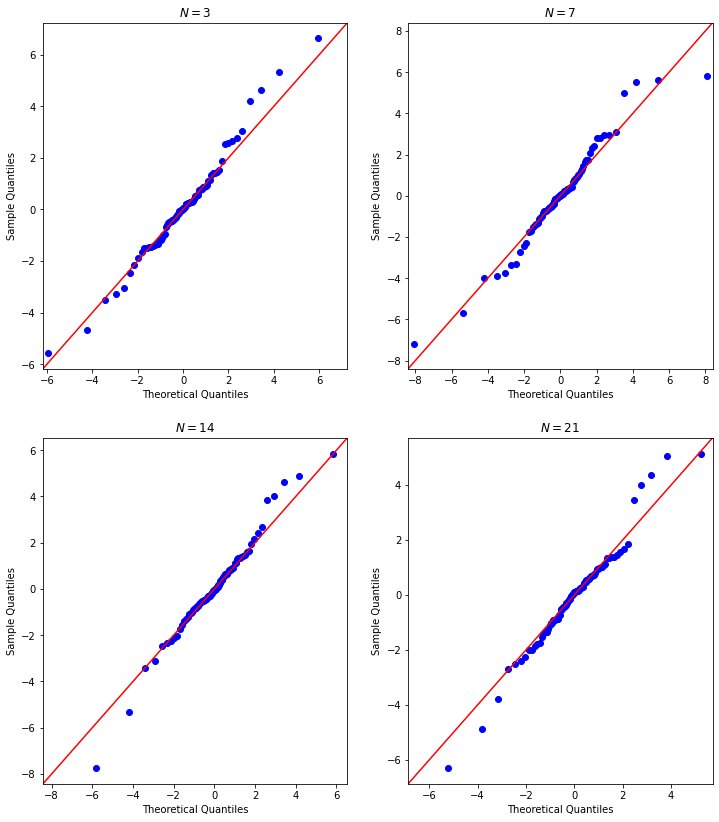

In [56]:
fig, ((a1, a2), (a3, a4)) = plt.subplots(2, 2, figsize=(12, 14))
sm.qqplot(res1, stats.t, ax=a1, fit=True, line="45", distargs=(4,))
sm.qqplot(res2, stats.t, ax=a2, fit=True, line="45", distargs=(4,))
sm.qqplot(res3, stats.t, ax=a3, fit=True, line="45", distargs=(4,))
sm.qqplot(res4, stats.t, ax=a4, fit=True, line="45", distargs=(6,))
a1.set_title('$N = 3$')
a2.set_title('$N = 7$')
a3.set_title('$N = 14$')
a4.set_title('$N = 21$')
plt.show()

